In [1]:
mainfolder = "/home/joonheek/APMT-Julia/"

"/home/joonheek/APMT-Julia/"

In [2]:
using Pkg
Pkg.activate(mainfolder*".")

 Activating environment at `~/APMT-Julia/Project.toml`


In [3]:
using MAT
using PyCall
using PyPlot
using NCDatasets
using Statistics

cartopy = pyimport("cartopy")
ccrs = pyimport("cartopy.crs")
cfeat = pyimport("cartopy.feature")
matcolors = pyimport("matplotlib.colors")
;

#### Upload surface area grid and population grid files

In [4]:
#2x2.5 resolution grid

ds_grid_2x25 = NCDataset(mainfolder*"regrid_files/regular_lat_lon_91x144.nc")
area_2x25 = float.(ds_grid_2x25["area"][:]); #m2

lon = ds_grid_2x25["lon"][:]
lat = ds_grid_2x25["lat"][:]

total_area = sum(area_2x25) #m2

println("total surface area = ", round(total_area/1e12, digits=2) , "e12 m²")

total surface area = 510.06e12 m²


In [5]:
#global population file in 2x2.5 resolution
ds_pop = NCDataset("/home/safrin/Python/Regrid_Output/Population_2015_2x2.5_PC_DC_global.nc")
pop_array = ds_pop["pop"][:,:,1] # (144,91) array
;

### Upload sensivities

In [6]:
ds_sens_2000 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_result_2000.nc")
ds_sens_2001 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_result_2001.nc")
ds_sens_2002 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_result_2002.nc")
ds_sens_2003 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_result_2003.nc")
ds_sens_2004 = NCDataset("/net/d15/data/jsoh/Sensitivity/2x25/NOx_new/Sen_result_2004.nc")
;

In [7]:
alt = float.(ds_sens_2000["height"][:]); #km

In [8]:
#Sensitivity_RF: convert (91 × 144 × 40) to (1 x 40)
sens_RF_2000 = float.(ds_sens_2000["Sensitivity_RF"][:])
sens_RF_2000 = permutedims(sens_RF_2000, [2, 1, 3])
sens_RF_2000 = reshape(sum(sens_RF_2000 .* area_2x25, dims=(1,2)) ./ total_area, 40)

sens_RF_2001 = float.(ds_sens_2001["Sensitivity_RF"][:])
sens_RF_2001 = permutedims(sens_RF_2001, [2, 1, 3])
sens_RF_2001 = reshape(sum(sens_RF_2001 .* area_2x25, dims=(1,2)) ./ total_area, 40)

sens_RF_2002 = float.(ds_sens_2002["Sensitivity_RF"][:])
sens_RF_2002 = permutedims(sens_RF_2002, [2, 1, 3])
sens_RF_2002 = reshape(sum(sens_RF_2002 .* area_2x25, dims=(1,2)) ./ total_area, 40)

sens_RF_2003 = float.(ds_sens_2003["Sensitivity_RF"][:])
sens_RF_2003 = permutedims(sens_RF_2003, [2, 1, 3])
sens_RF_2003 = reshape(sum(sens_RF_2003 .* area_2x25, dims=(1,2)) ./ total_area, 40)

sens_RF_2004 = float.(ds_sens_2004["Sensitivity_RF"][:])
sens_RF_2004 = permutedims(sens_RF_2004, [2, 1, 3])
sens_RF_2004 = reshape(sum(sens_RF_2004 .* area_2x25, dims=(1,2)) ./ total_area, 40)


# "Sensitivity_sfc_ozone": convert (91 × 144 × 40) to (144 x 91 x 40)
sens_O3_2000 = float.(ds_sens_2000["Sensitivity_sfc_ozone"][:]) .* 1.5 #scaling 24hr-average to MDA8
sens_O3_2000 = permutedims(sens_O3_2000, [2, 1, 3])

sens_O3_2001 = float.(ds_sens_2001["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2001 = permutedims(sens_O3_2001, [2, 1, 3])

sens_O3_2002 = float.(ds_sens_2002["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2002 = permutedims(sens_O3_2002, [2, 1, 3])

sens_O3_2003 = float.(ds_sens_2003["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2003 = permutedims(sens_O3_2003, [2, 1, 3])

sens_O3_2004 = float.(ds_sens_2004["Sensitivity_sfc_ozone"][:]) .* 1.5
sens_O3_2004 = permutedims(sens_O3_2004, [2, 1, 3])


# "Sensitivity_PM25": convert (91 × 144 × 40) to (144 x 91 x 40)
sens_PM_2000 = float.(ds_sens_2000["Sensitivity_PM25"][:])
sens_PM_2000 = permutedims(sens_PM_2000, [2, 1, 3])

sens_PM_2001 = float.(ds_sens_2001["Sensitivity_PM25"][:])
sens_PM_2001 = permutedims(sens_PM_2001, [2, 1, 3])

sens_PM_2002 = float.(ds_sens_2002["Sensitivity_PM25"][:])
sens_PM_2002 = permutedims(sens_PM_2002, [2, 1, 3])

sens_PM_2003 = float.(ds_sens_2003["Sensitivity_PM25"][:])
sens_PM_2003 = permutedims(sens_PM_2003, [2, 1, 3])

sens_PM_2004 = float.(ds_sens_2004["Sensitivity_PM25"][:])
sens_PM_2004 = permutedims(sens_PM_2004, [2, 1, 3])


# "Sensitivity_col_ozone": convert (91 × 144 × 40) to (144 x 91 x 40)
sens_colO3_2000 = float.(ds_sens_2000["Sensitivity_col_ozone"][:])
sens_colO3_2000 = permutedims(sens_colO3_2000, [2, 1, 3])

sens_colO3_2001 = float.(ds_sens_2001["Sensitivity_col_ozone"][:])
sens_colO3_2001 = permutedims(sens_colO3_2001, [2, 1, 3])

sens_colO3_2002 = float.(ds_sens_2002["Sensitivity_col_ozone"][:])
sens_colO3_2002 = permutedims(sens_colO3_2002, [2, 1, 3])

sens_colO3_2003 = float.(ds_sens_2003["Sensitivity_col_ozone"][:])
sens_colO3_2003 = permutedims(sens_colO3_2003, [2, 1, 3])

sens_colO3_2004 = float.(ds_sens_2004["Sensitivity_col_ozone"][:])
sens_colO3_2004 = permutedims(sens_colO3_2004, [2, 1, 3])


# "Sensitivity_zonal_ozone": (72 × 91 × 40)
sens_zonalO3_2000 = float.(ds_sens_2000["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2001 = float.(ds_sens_2001["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2002 = float.(ds_sens_2002["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2003 = float.(ds_sens_2003["Sensitivity_zonal_ozone"][:])

sens_zonalO3_2004 = float.(ds_sens_2004["Sensitivity_zonal_ozone"][:])
;

In [9]:
#Labels
#cruise altitudes
alts = ["8-10 km", "10-12 km", "12-14 km", "14-16 km", "16-18 km", "18-20 km", "20-22 km", "22-24 km", "24-26 km"]

#cruise latitudes
lats_a = ["60°N-90°N", "30°N-60°N", "0°-30°N", "30°S-0°", "90°S-30°S"] #8-16 km
lats_b = ["60°N-90°N", "30°N-60°N", "30°S-30°N", "90°S-30°S"]         #16-26 km

;

#### Save RF/PM/O3 dictionaries by sensitivity num

In [10]:
#create dictionaries for cruise sensitivities (1-40)

#dict:                  sensitivity #        
#       -> "cruise"  -> 1                   -> "data"  -> Array, size(year) or size(144,91,year)
#                    -> 2                   -> other variables
#         ...                    .....
#                    -> 40

RF_years = 2000:2004
AQ_years = 2000:2004
O3_years = 2000:2004
n_cruise = 40

RF_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
PM_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
O3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
colO3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()
zonalO3_dict = Dict{String,Dict{Int64,Dict{String,Any}}}()

RF_dict["cruise"] = Dict{Int64,Dict{String,Any}}()
PM_dict["cruise"] = Dict{Int64,Dict{String,Any}}()
O3_dict["cruise"] = Dict{Int64,Dict{String,Any}}()
colO3_dict["cruise"] = Dict{Int64,Dict{String,Any}}()
zonalO3_dict["cruise"] = Dict{Int64,Dict{String,Any}}()

for i in 1:n_cruise
    RF_dict["cruise"][i] = Dict{String,Any}()
    RF_dict["cruise"][i]["data"] = zeros(length(RF_years))
    RF_dict["cruise"][i]["data"][1] += sens_RF_2000[i]
    RF_dict["cruise"][i]["data"][2] += sens_RF_2001[i]
    RF_dict["cruise"][i]["data"][3] += sens_RF_2002[i]
    RF_dict["cruise"][i]["data"][4] += sens_RF_2003[i]
    RF_dict["cruise"][i]["data"][5] += sens_RF_2004[i]
    
    PM_dict["cruise"][i] = Dict{String,Any}()
    PM_dict["cruise"][i]["data"] = zeros(144,91,length(AQ_years))
    PM_dict["cruise"][i]["data"][:,:,1] .+= sens_PM_2000[:,:,i]
    PM_dict["cruise"][i]["data"][:,:,2] .+= sens_PM_2001[:,:,i]
    PM_dict["cruise"][i]["data"][:,:,3] .+= sens_PM_2002[:,:,i]
    PM_dict["cruise"][i]["data"][:,:,4] .+= sens_PM_2003[:,:,i]
    PM_dict["cruise"][i]["data"][:,:,5] .+= sens_PM_2004[:,:,i]
    
    O3_dict["cruise"][i] = Dict{String,Any}()
    O3_dict["cruise"][i]["data"] = zeros(144,91,length(AQ_years))
    O3_dict["cruise"][i]["data"][:,:,1] .+= sens_O3_2000[:,:,i]
    O3_dict["cruise"][i]["data"][:,:,2] .+= sens_O3_2001[:,:,i]
    O3_dict["cruise"][i]["data"][:,:,3] .+= sens_O3_2002[:,:,i]
    O3_dict["cruise"][i]["data"][:,:,4] .+= sens_O3_2003[:,:,i]
    O3_dict["cruise"][i]["data"][:,:,5] .+= sens_O3_2004[:,:,i]
    
    colO3_dict["cruise"][i] = Dict{String,Any}()
    colO3_dict["cruise"][i]["data"] = zeros(144,91,length(O3_years))
    colO3_dict["cruise"][i]["data"][:,:,1] .+= sens_colO3_2000[:,:,i]
    colO3_dict["cruise"][i]["data"][:,:,2] .+= sens_colO3_2001[:,:,i]
    colO3_dict["cruise"][i]["data"][:,:,3] .+= sens_colO3_2002[:,:,i]
    colO3_dict["cruise"][i]["data"][:,:,4] .+= sens_colO3_2003[:,:,i]
    colO3_dict["cruise"][i]["data"][:,:,5] .+= sens_colO3_2004[:,:,i]
    
    zonalO3_dict["cruise"][i] = Dict{String,Any}()
    zonalO3_dict["cruise"][i]["data"] = zeros(72, 91,length(O3_years))
    zonalO3_dict["cruise"][i]["data"][:,:,1] .+= sens_zonalO3_2000[:,:,i]
    zonalO3_dict["cruise"][i]["data"][:,:,2] .+= sens_zonalO3_2001[:,:,i]
    zonalO3_dict["cruise"][i]["data"][:,:,3] .+= sens_zonalO3_2002[:,:,i]
    zonalO3_dict["cruise"][i]["data"][:,:,4] .+= sens_zonalO3_2003[:,:,i]
    zonalO3_dict["cruise"][i]["data"][:,:,5] .+= sens_zonalO3_2004[:,:,i]
end



#create/combine 30S-30N for altitudes below 16km
RF_dict["cruise"][3400] = Dict{String,Any}()
RF_dict["cruise"][3400]["data"] = 0.5 .* (RF_dict["cruise"][3]["data"] + RF_dict["cruise"][4]["data"])

RF_dict["cruise"][8900] = Dict{String,Any}()
RF_dict["cruise"][8900]["data"] = 0.5 .* (RF_dict["cruise"][8]["data"] + RF_dict["cruise"][9]["data"])

RF_dict["cruise"][1314] = Dict{String,Any}()
RF_dict["cruise"][1314]["data"] = 0.5 .* (RF_dict["cruise"][13]["data"] + RF_dict["cruise"][14]["data"])

RF_dict["cruise"][1819] = Dict{String,Any}()
RF_dict["cruise"][1819]["data"] = 0.5 .* (RF_dict["cruise"][18]["data"] + RF_dict["cruise"][19]["data"])



PM_dict["cruise"][3400] = Dict{String,Any}()
PM_dict["cruise"][3400]["data"] = 0.5 .* (PM_dict["cruise"][3]["data"] + PM_dict["cruise"][4]["data"])

PM_dict["cruise"][8900] = Dict{String,Any}()
PM_dict["cruise"][8900]["data"] = 0.5 .* (PM_dict["cruise"][8]["data"] + PM_dict["cruise"][9]["data"])

PM_dict["cruise"][1314] = Dict{String,Any}()
PM_dict["cruise"][1314]["data"] = 0.5 .* (PM_dict["cruise"][13]["data"] + PM_dict["cruise"][14]["data"])

PM_dict["cruise"][1819] = Dict{String,Any}()
PM_dict["cruise"][1819]["data"] = 0.5 .* (PM_dict["cruise"][18]["data"] + PM_dict["cruise"][19]["data"])


O3_dict["cruise"][3400] = Dict{String,Any}()
O3_dict["cruise"][3400]["data"] = 0.5 .* (O3_dict["cruise"][3]["data"] + O3_dict["cruise"][4]["data"])

O3_dict["cruise"][8900] = Dict{String,Any}()
O3_dict["cruise"][8900]["data"] = 0.5 .* (O3_dict["cruise"][8]["data"] + O3_dict["cruise"][9]["data"])

O3_dict["cruise"][1314] = Dict{String,Any}()
O3_dict["cruise"][1314]["data"] = 0.5 .* (O3_dict["cruise"][13]["data"] + O3_dict["cruise"][14]["data"])

O3_dict["cruise"][1819] = Dict{String,Any}()
O3_dict["cruise"][1819]["data"] = 0.5 .* (O3_dict["cruise"][18]["data"] + O3_dict["cruise"][19]["data"])
;

In [11]:
#Sensitivities are 1-40, but latitude regions are NOT consistent for each altitude range


#Dictionary: sensitivity # -> plot index
map_sens_to_plot = Dict(
                    1=>1, 2=>2, 3=>3, 4=>4, 5=>5,
                    6=>6, 7=>7, 8=>8, 9=>9, 10=>10,
                    11=>11, 12=>12, 13=>13, 14=>14, 15=>15,
                    16=>16, 17=>17, 18=>18, 19=>19, 20=>20,
                    21=>21, 22=>22, 23=>23, 24=>25, 
                    25=>26, 26=>27, 27=>28, 28=>30, 
                    29=>31, 30=>32, 31=>33, 32=>35, 
                    33=>36, 34=>37, 35=>38, 36=>40, 
                    37=>41, 38=>42, 39=>43, 40=>45,
                    )

#Dictionary: latitude region -> sensitivity #
map_sens_to_lat = Dict(
                    1 => [1,6,11,16,21,25,29,33,37],
                    2 => [2,7,12,17,22,26,30,34,38],
                    3 => [3400,8900,1314,1819,23,27,31,35,39],
                    4 => [5,10,15,20,24,28,32,36,40],
                    )
;


## Figures

In [12]:
plt.rc("font", size=10)

### RF

In [13]:
fix_RF_ylim = false
;

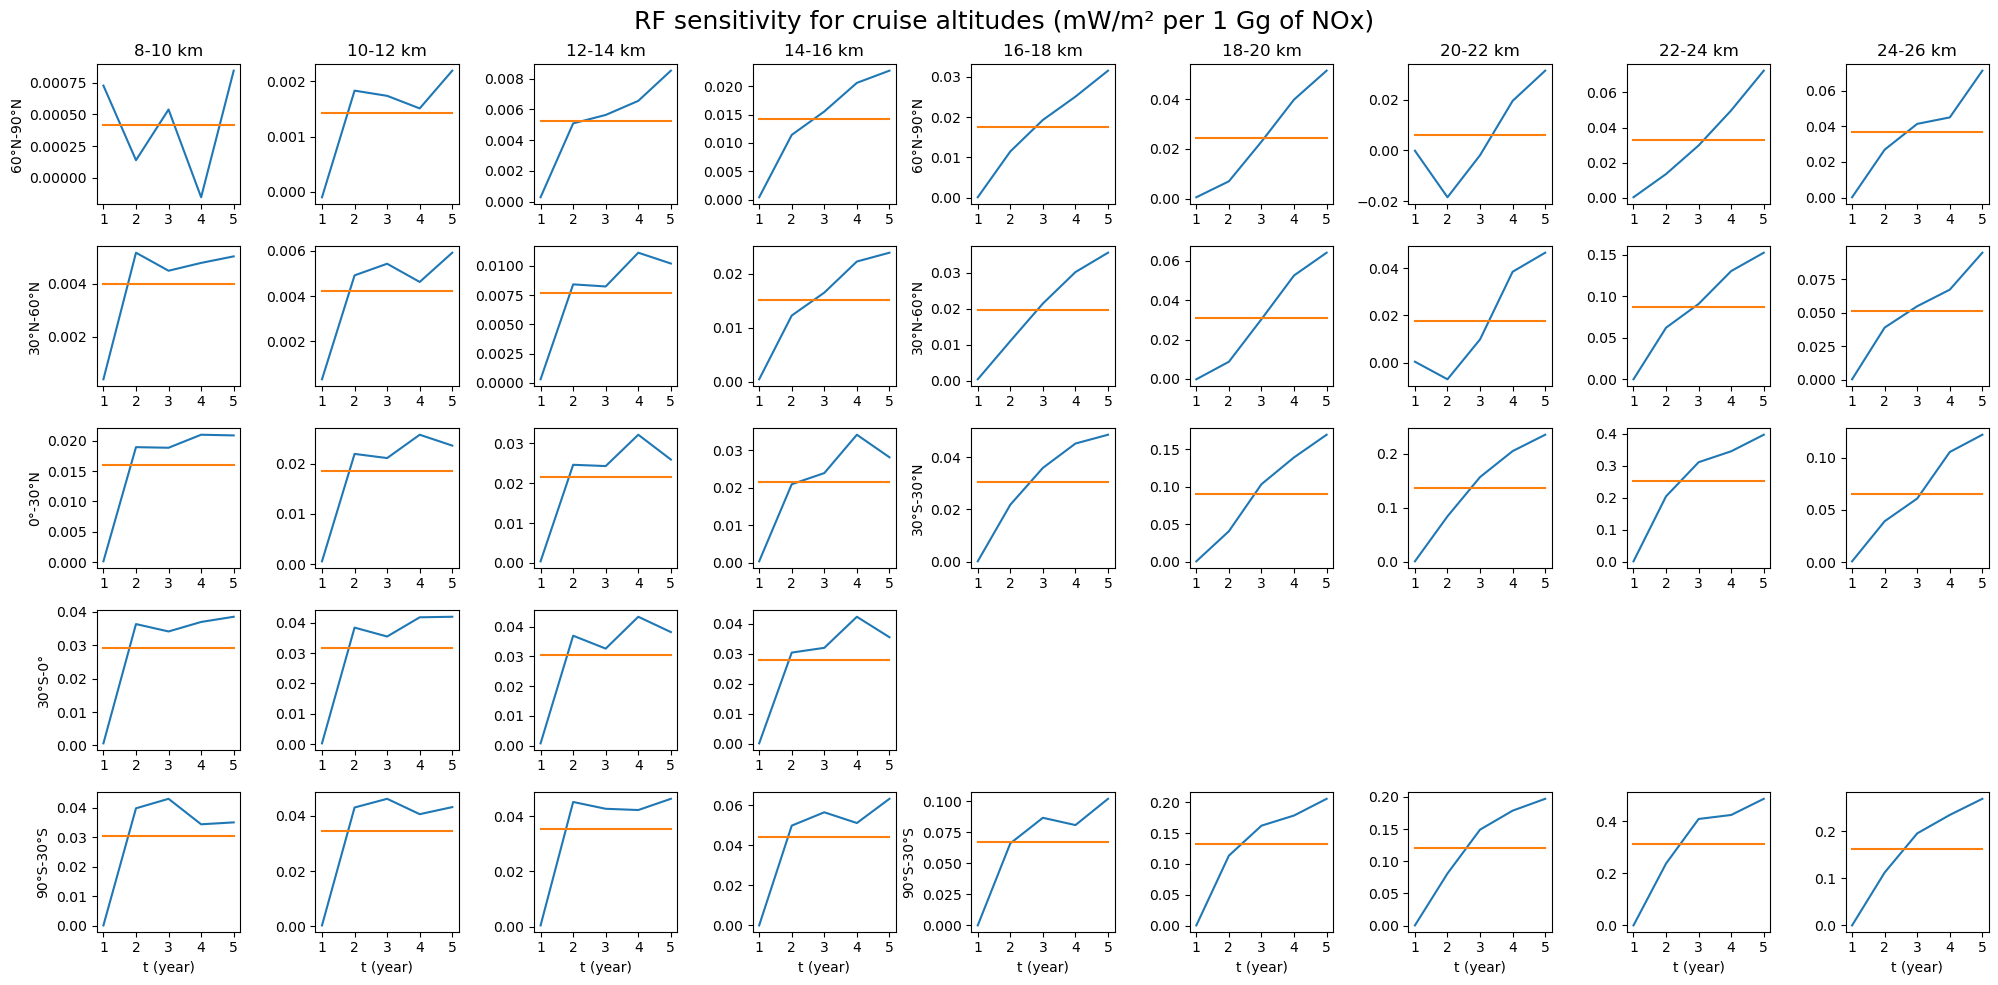

In [14]:
fig, axs = plt.subplots(5,9, figsize=(20, 10))
#format
fig.suptitle("RF sensitivity for cruise altitudes (mW/m² per 1 Gg of NOx)", fontsize=18)
for i in 5:9
    axs[4,i].axis("off")
end

for ialt in 1:length(alts)
    axs[1, ialt].set(title=alts[ialt])
end

for ilat in 1:length(lats_a)
    axs[ilat,1].set(ylabel=lats_a[ilat])
end

for ilat in 1:3
    axs[ilat,5].set(ylabel=lats_b[ilat])
end
axs[5,5].set(ylabel=lats_b[4])


#plot
for i in 1:40
    RFs = RF_dict["cruise"][i]["data"] .*1e3
    avg_RF = mean(RF_dict["cruise"][i]["data"]) .* 1e3
    i_axs = map_sens_to_plot[i]
    axs[i_axs].plot(1:5, RFs)
    axs[i_axs].plot(1:5,ones(5).*avg_RF)
    axs[i_axs].set(xticks=1:5)
    
    if fix_RF_ylim
        axs[i_axs].set(ylim=[-0.1,0.5])
    end
end

for j in 1:length(alts)
    axs[end,j].set(xlabel="t (year)")
end

fig.tight_layout()

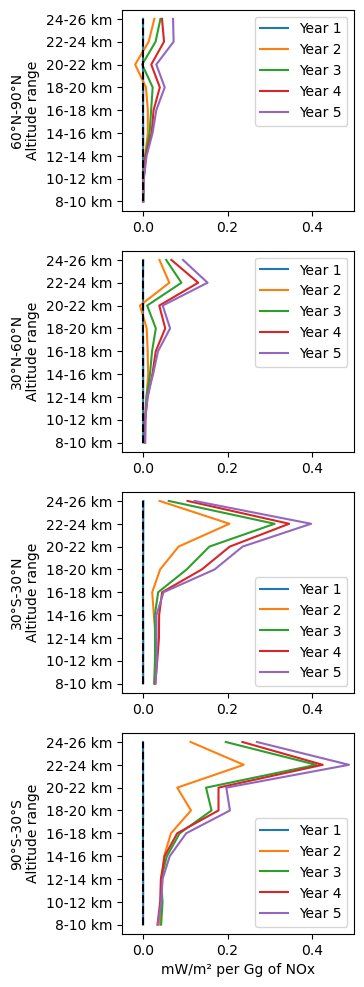

sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [15]:
fig, axs = plt.subplots(length(lats_b), 1, figsize=(3, 12))

for ilat in 1:length(lats_b)
    for iyr in 1:length(RF_years)
        axs[ilat].plot([RF_dict["cruise"][isens]["data"][iyr] for isens in map_sens_to_lat[ilat]].*1e3, 1:9, label="Year "*string(iyr))
    end
    axs[ilat].plot([0,0], [1,length(alts)], "k--", )
    axs[ilat].set(ylabel=lats_b[ilat] * "\n" * "Altitude range")
    axs[ilat].set(yticks=1:9, yticklabels=alts[1:9])
    axs[ilat].set(xlim=[-.05,0.5])
    axs[ilat].legend()
end

axs[end].set(xlabel="mW/m² per Gg of NOx")
;

In [16]:
avg_RF = zeros(40)
for i in 1:n_cruise
    avg_RF[i] = mean(RF_dict["cruise"][i]["data"])
end

In [17]:
lat_pts = [75, 45, 15, -15, -60,
        75, 45, 15, -15, -60,
        75, 45, 15, -15, -60,
        75, 45, 15, -15, -60,
        75, 45, 0, -60,
        75, 45, 0, -60,
        75, 45, 0, -60,
        75, 45, 0, -60,
        75, 45, 0, -60,
        ]
alt_pts = [9, 9, 9, 9, 9, 
        11, 11, 11, 11, 11,
        13, 13, 13, 13, 13,
        15, 15, 15, 15, 15,
        17, 17, 17, 17,
        19, 19, 19, 19,
        21, 21, 21, 21,
        23, 23, 23, 23,
        25, 25, 25, 25, 
        ]
;

In [18]:
rect_map = Dict()
l = 90
h = 8
for i in 1:40
    if h < 15
        if l <= -30
            width = 60
        else
            width = 30
        end
        l -= width
        # go up
        if l < -90
            l = 60
            h += 2
        end
    else
        if l <= 30
            width = 60
        else
            width = 30
        end
        l -= width
        
        # go up
        if l < -90
            l = 60
            h += 2
        end
    end
        rect_map[i] = (l,h,width,2)
end

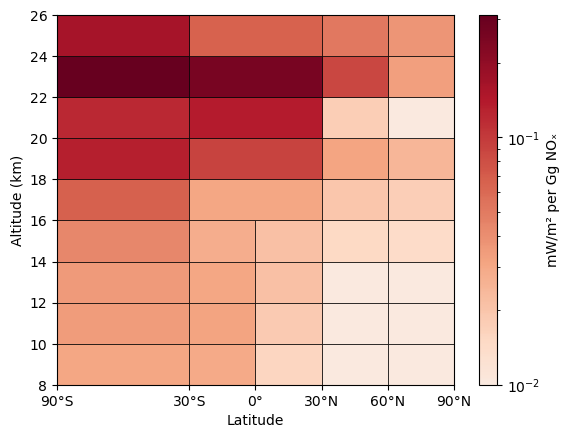

In [20]:
#average over 5 years

# create Rd cmap
cmap = plt.get_cmap("RdBu_r")
new_cmap = matcolors.LinearSegmentedColormap.from_list("only_Rd",cmap(LinRange(0.55,1,100)))

sc = plt.scatter(lat_pts, alt_pts, c=avg_RF.*1e3, cmap=new_cmap, 
        norm=matcolors.LogNorm(vmin=1e-2, vmax=maximum(avg_RF.*1e3)))

for i in 1:40
    plt.gca().add_patch(matplotlib.patches.Rectangle((
            rect_map[i][1], rect_map[i][2]), rect_map[i][3],rect_map[i][4],
            edgecolor="black",
            lw=0.5,
            facecolor=sc.to_rgba(avg_RF[i].*1e3)))
end


cbar = plt.colorbar()
cbar.set_label("mW/m² per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")

plt.xlim([-90,90])
plt.ylim([8,26])

plt.yticks([8,10,12,14,16,18,20,22,24,26])
plt.xticks([-90,-30,0,30,60,90], labels=["90°S","30°S","0°", "30°N", "60°N", "90°N"])

plt.show()

### PM2.5

In [21]:
fix_PM_ylim = false
;

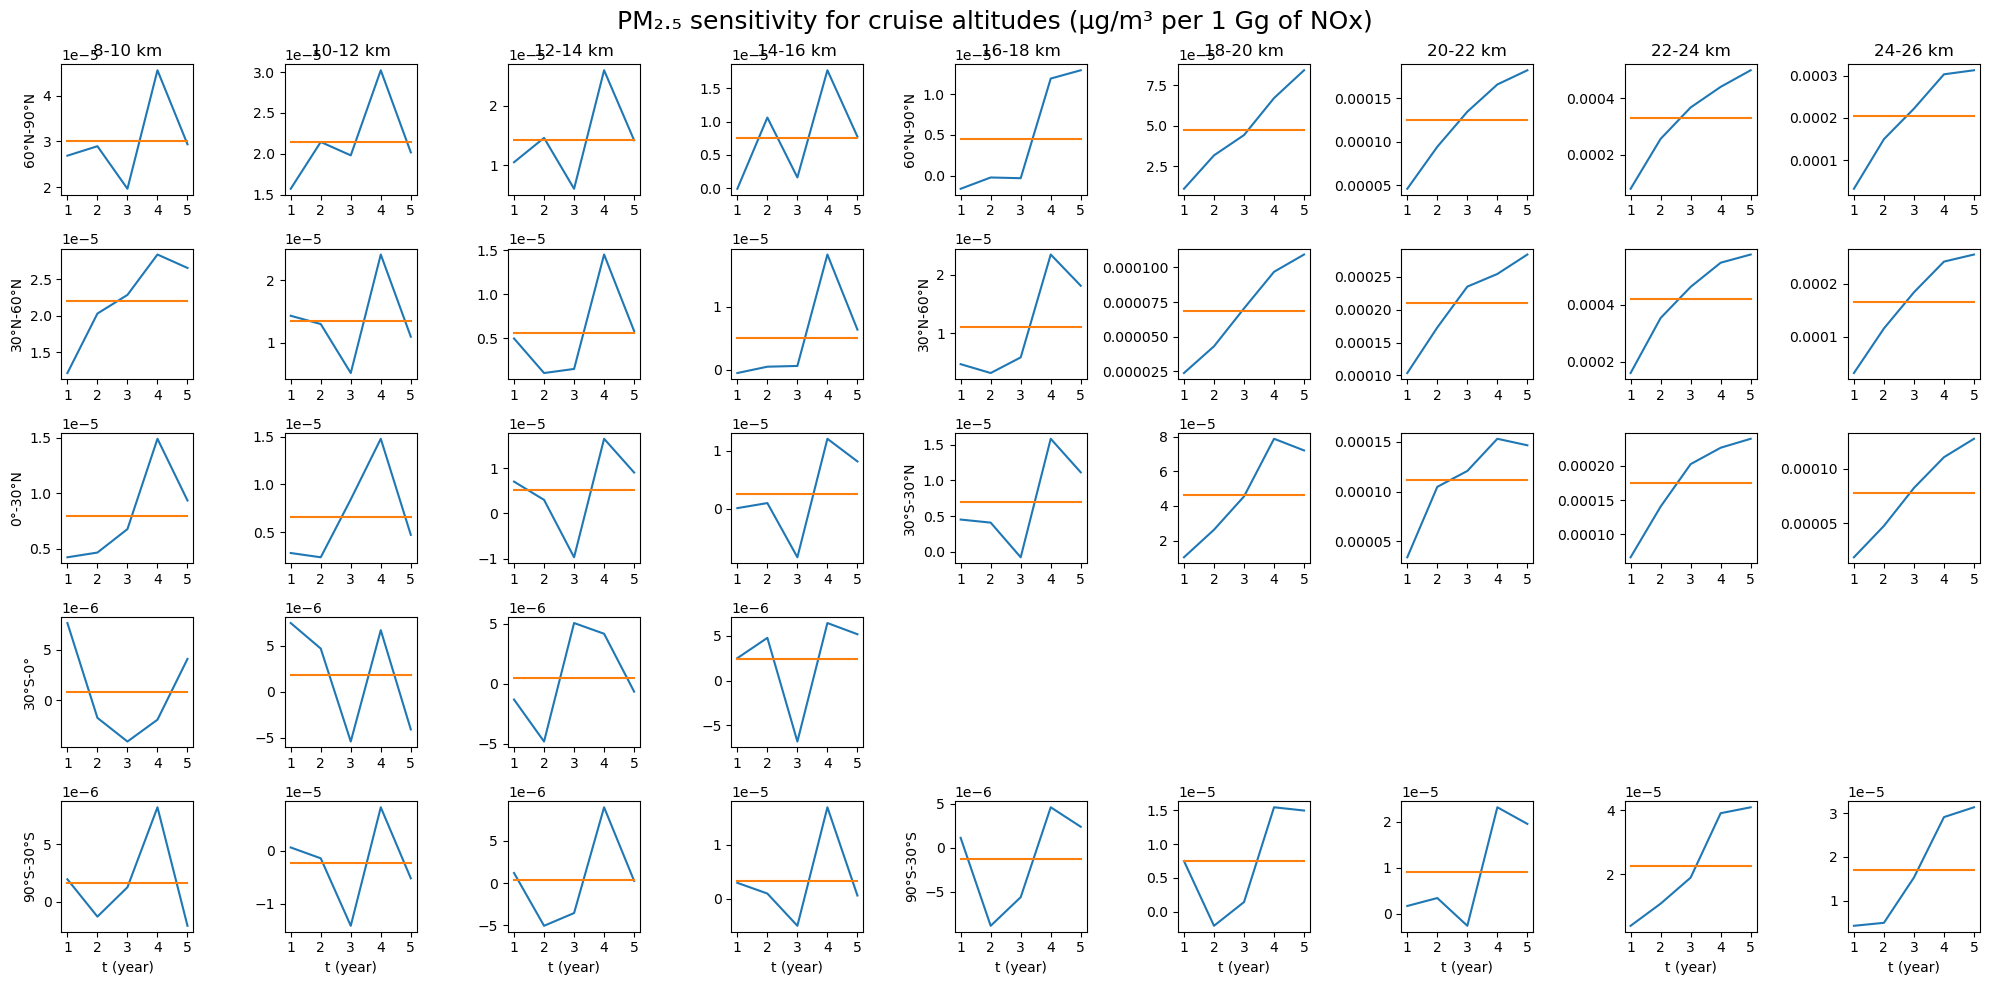

In [22]:
fig, axs = plt.subplots(5,9, figsize=(20, 10))
#format
fig.suptitle("PM₂.₅ sensitivity for cruise altitudes (μg/m³ per 1 Gg of NOx)", fontsize=18)

for i in 5:9
    axs[4,i].axis("off")
end

for ialt in 1:length(alts)
    axs[1, ialt].set(title=alts[ialt])
end

for ilat in 1:length(lats_a)
    axs[ilat,1].set(ylabel=lats_a[ilat])
end

for ilat in 1:3
    axs[ilat,5].set(ylabel=lats_b[ilat])
end
axs[5,5].set(ylabel=lats_b[4])


#plot
for i in 1:n_cruise
    avg_exp = vec(sum(PM_dict["cruise"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))    
    i_axs = map_sens_to_plot[i]
    axs[i_axs].plot(1:5, avg_exp)
    
    avg_grid = mean(PM_dict["cruise"][i]["data"],dims=3)[:,:,1]
    avg_grid_avg_exp = repeat(sum(avg_grid .* pop_array, dims=(1,2)) ./ sum(pop_array),5)
    axs[i_axs].plot(1:5, avg_grid_avg_exp)
    
    axs[i_axs].set(xticks=1:5)
    
    if fix_PM_ylim
        axs[i_axs].set(ylim=[-5e-5,6e-4])
    end
end

for j in 1:length(alts)
    axs[end,j].set(xlabel="t (year)")
end

fig.tight_layout()

In [23]:
pop_avg_PM_exp = zeros(5,40)
for i in 1:n_cruise
    avg_exp = vec(sum(PM_dict["cruise"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))
    pop_avg_PM_exp[:,i] = avg_exp
end
pop_avg_PM_exp #nyears (5) x nsensitivities (40)

5×40 Array{Float64,2}:
 2.68825e-5  1.2168e-5   4.24274e-6   7.65733e-6  …  1.90731e-5   4.2836e-6
 2.89624e-5  2.02946e-5  4.66912e-6  -1.72208e-6     4.77435e-5   4.96523e-6
 1.96105e-5  2.28388e-5  6.78448e-6  -4.06331e-6     8.23617e-5   1.53145e-5
 4.56522e-5  2.8358e-5   1.49284e-5  -1.90299e-6     0.000110459  2.91149e-5
 2.93926e-5  2.65228e-5  9.36109e-6   4.10879e-6     0.000127274  3.1357e-5

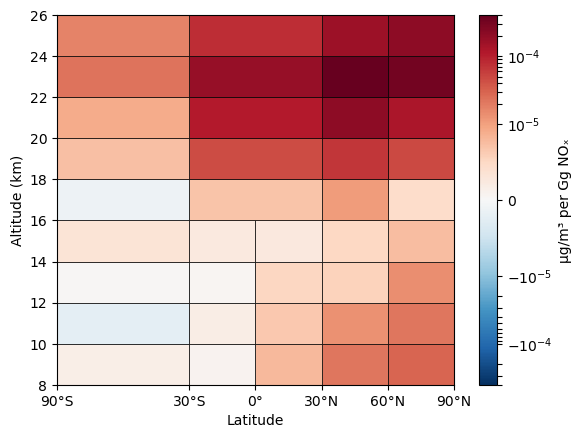

In [24]:
#average over 5 years

# create new cmap
cmap = plt.get_cmap("RdBu_r")
vmin = -4e-4
vmax = 4e-4


sc = plt.scatter(lat_pts, alt_pts, c=mean(pop_avg_PM_exp,dims=1),
                    cmap=cmap,
#                     norm=matcolors.LogNorm(vmin=vmin, vmax=vmax)) 
#                     vmin=vmin, vmax=vmax)

norm = matcolors.SymLogNorm(linthresh = 1e-5,
                                                linscale = 1,
                                                vmin = vmin, 
                                                vmax = vmax),
    )
for i in 1:40
    plt.gca().add_patch(matplotlib.patches.Rectangle((
            rect_map[i][1], rect_map[i][2]), rect_map[i][3],rect_map[i][4],
            edgecolor="black",
            lw=0.5,
            facecolor=sc.to_rgba(mean(pop_avg_PM_exp,dims=1)[i])))
end


cbar = plt.colorbar()
cbar.set_label("μg/m³ per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")
plt.xlim([-90,90])
plt.ylim([8,26])

plt.yticks([8,10,12,14,16,18,20,22,24,26])
plt.xticks([-90,-30,0,30,60,90], labels=["90°S","30°S","0°", "30°N", "60°N", "90°N"])

plt.show()


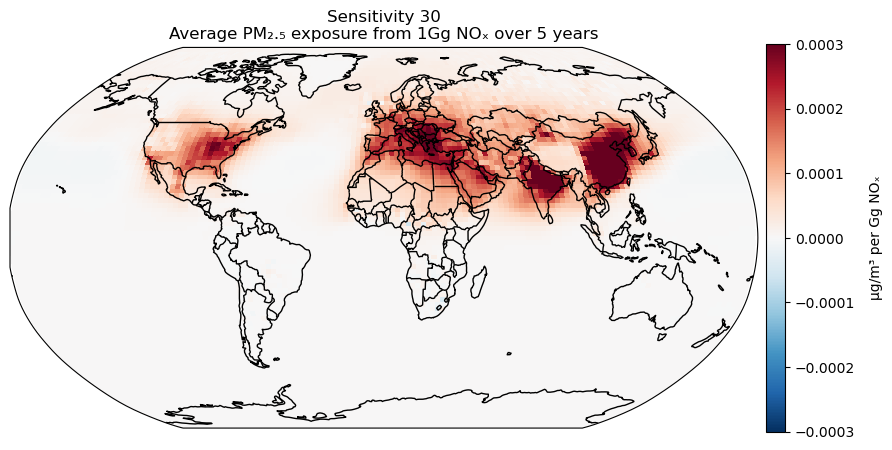

In [25]:
i = 30
avg_grid = mean(PM_dict["cruise"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-3e-4, vmax=3e-4,cmap="RdBu_r",
)

title("Sensitivity "*string(i)*"\n"*"Average PM₂.₅ exposure from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("μg/m³ per Gg NOₓ", labelpad=10)
;

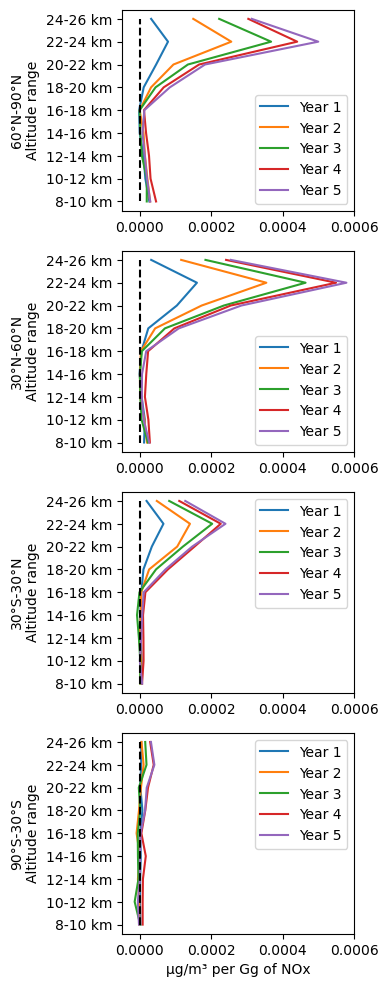

sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [26]:
fig, axs = plt.subplots(length(lats_b), 1, figsize=(3, 12))

for ilat in 1:length(lats_b)
    for iyr in 1:length(AQ_years)
        avg_exp = [sum(PM_dict["cruise"][isens]["data"][:,:,iyr].*pop_array) for isens in map_sens_to_lat[ilat]] ./ sum(pop_array)
        
        axs[ilat].plot(avg_exp, 1:9, label="Year "*string(iyr))
    end
    axs[ilat].plot([0,0], [1,9], "k--", )
    axs[ilat].set(ylabel=lats_b[ilat] * "\n" * "Altitude range")
    axs[ilat].set(yticks=1:9, yticklabels=alts[1:9])
    axs[ilat].set(xlim=[-5e-5,6e-4])
    axs[ilat].legend()
end

axs[end].set(xlabel="μg/m³ per Gg of NOx")
;

### surface O3

In [27]:
fix_O3_ylim = false
;

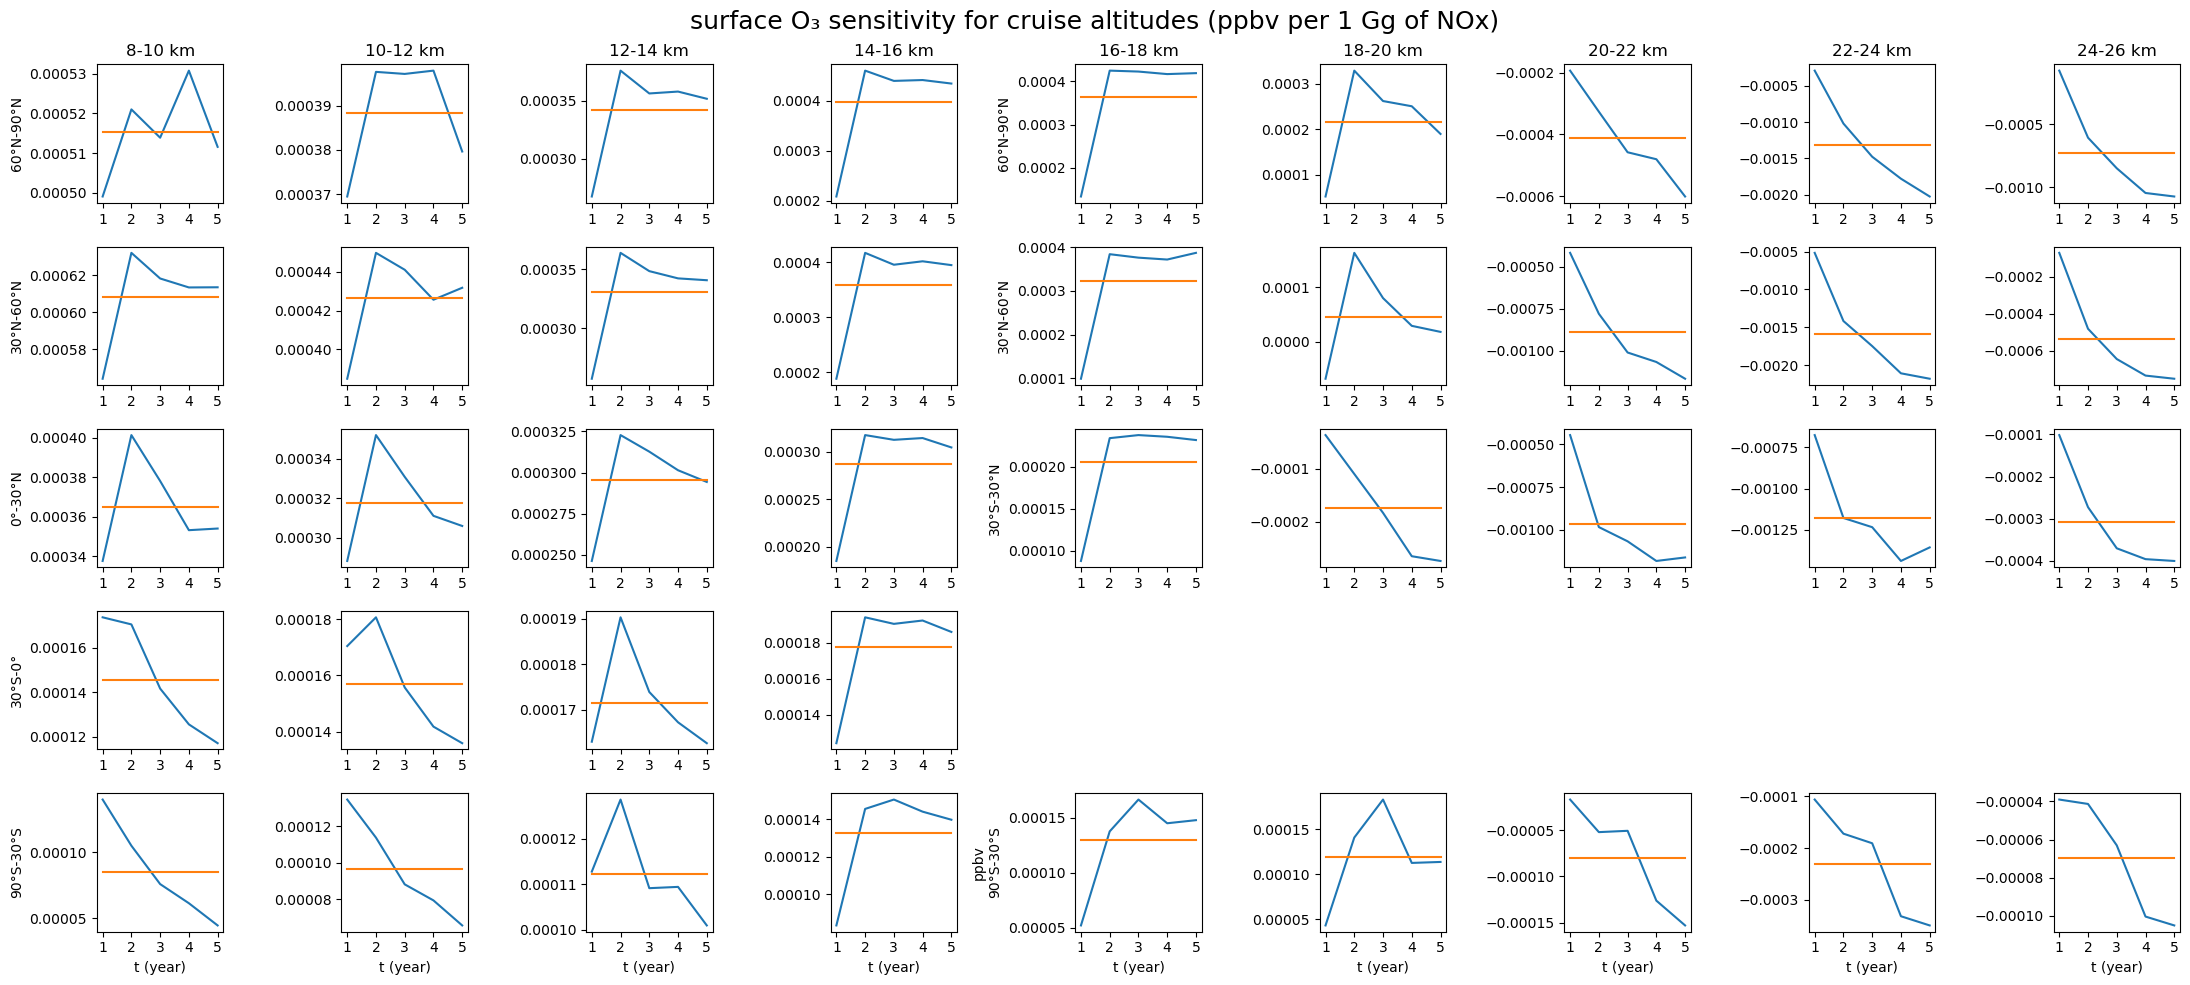

In [28]:
fig, axs = plt.subplots(5,9, figsize=(22, 10))
#format
fig.suptitle("surface O₃ sensitivity for cruise altitudes (ppbv per 1 Gg of NOx)", fontsize=18)

for i in 5:9
    axs[4,i].axis("off")
end

for ialt in 1:length(alts)
    axs[1, ialt].set(title=alts[ialt])
end

for ilat in 1:length(lats_a)
    axs[ilat,1].set(ylabel=lats_a[ilat])
end

for ilat in 1:3
    axs[ilat,5].set(ylabel=lats_b[ilat])
end
axs[5,5].set(ylabel="ppbv"*"\n"*lats_b[4])


#plot
for i in 1:n_cruise
    avg_exp = vec(sum(O3_dict["cruise"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))
    i_axs = map_sens_to_plot[i]
    axs[i_axs].plot(1:5, avg_exp)
    
    avg_grid = mean(O3_dict["cruise"][i]["data"],dims=3)[:,:,1]
    avg_grid_avg_exp = repeat(sum(avg_grid .* pop_array, dims=(1,2)) ./ sum(pop_array),5)
    axs[i_axs].plot(1:5, avg_grid_avg_exp)
    
    axs[i_axs].set(xticks=1:5)
    
    if fix_O3_ylim
        axs[i_axs].set(ylim=[-1.5e-3,6e-4])
    end
end

for j in 1:length(alts)
    axs[end,j].set(xlabel="t (year)")
end


fig.tight_layout()

In [29]:
# POP WEIGHTED AVG VALUES
pop_avg_O3_exp = zeros(5,40)
for i in 1:n_cruise
    avg_exp = vec(sum(O3_dict["cruise"][i]["data"] .* pop_array, dims=(1,2)) ./ sum(pop_array))
    pop_avg_O3_exp[:,i] = avg_exp
end 

In [30]:
pop_avg_O3_exp #nyears (5) x nsensitivities (40)

5×40 Array{Float64,2}:
 0.000499113  0.000564201  0.000337742  …  -0.000101619  -3.90091e-5
 0.000520994  0.000632035  0.000401367     -0.00027279   -4.13133e-5
 0.000513881  0.000618224  0.000378168     -0.000370462  -6.30447e-5
 0.000530733  0.000613397  0.000353304     -0.000396218  -0.000100411
 0.000511582  0.000613487  0.000354133     -0.000400531  -0.00010506

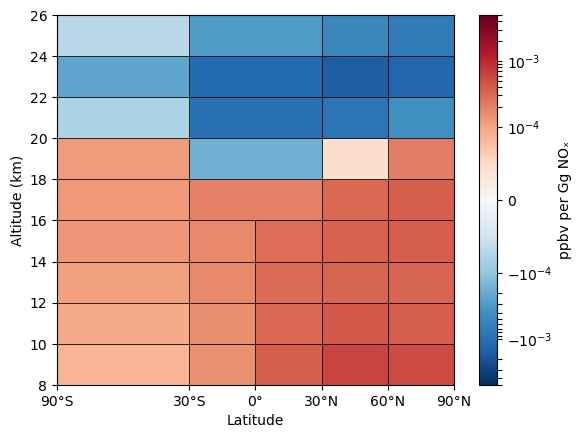

In [31]:
#average over 5 years

# create new cmap
cmap = plt.get_cmap("RdBu_r")
vmin = -5e-3
vmax = 5e-3


sc = plt.scatter(lat_pts, alt_pts, c=mean(pop_avg_O3_exp,dims=1),
                    cmap=cmap,
#                     norm=matcolors.LogNorm(vmin=vmin, vmax=vmax)) 
#                     vmin=vmin, vmax=vmax)

                    norm = matcolors.SymLogNorm(linthresh = 1e-4,
                                                linscale = 1,
                                                vmin = vmin, 
                                                vmax = vmax),
                    )
for i in 1:40
    plt.gca().add_patch(matplotlib.patches.Rectangle((
            rect_map[i][1], rect_map[i][2]), rect_map[i][3],rect_map[i][4],
            edgecolor="black",
            lw=0.5,
            facecolor=sc.to_rgba(mean(pop_avg_O3_exp,dims=1)[i])))
end

cbar = plt.colorbar()
cbar.set_label("ppbv per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")
plt.xlim([-90,90])
plt.ylim([8,26])

plt.yticks([8,10,12,14,16,18,20,22,24,26])
plt.xticks([-90,-30,0,30,60,90], labels=["90°S","30°S","0°", "30°N", "60°N", "90°N"])

plt.show()


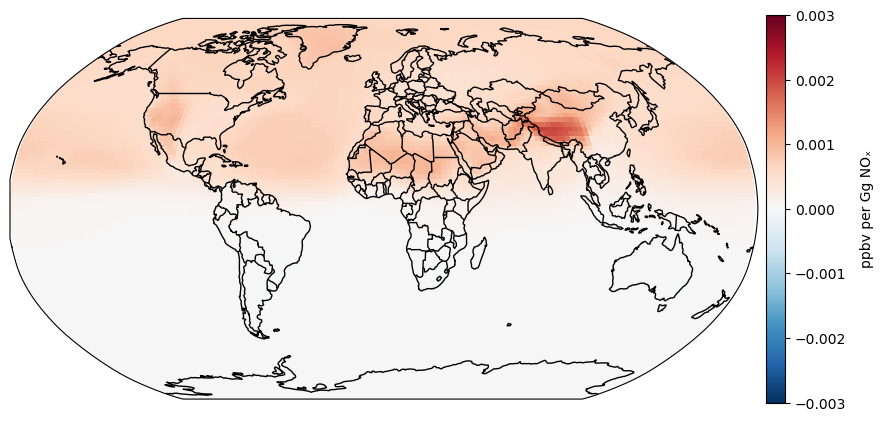

In [32]:
i = 7
avg_grid = mean(O3_dict["cruise"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-3e-3, vmax=3e-3,cmap="RdBu_r",
)

# title("Sensitivity "*string(i)*"\n"*"Average surf O₃ exposure from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("ppbv per Gg NOₓ", labelpad=10)
;

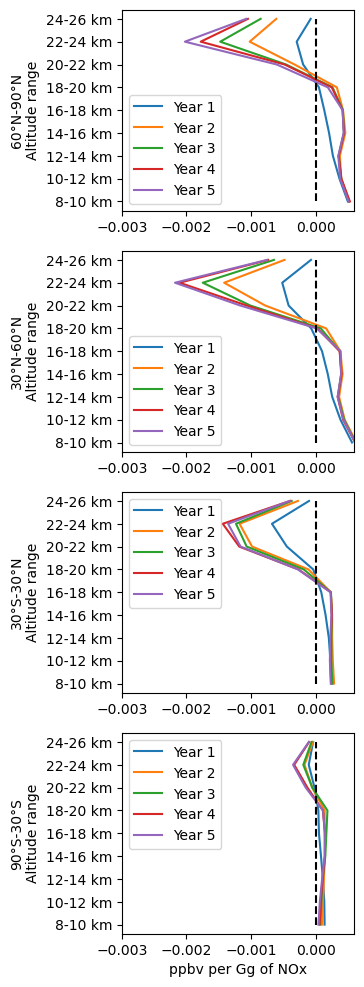

sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator
sys:1: UserWarning: FixedFormatter should only be used together with FixedLocator


In [34]:
fig, axs = plt.subplots(length(lats_b), 1, figsize=(3, 12))

for ilat in 1:length(lats_b)
    for iyr in 1:length(AQ_years)
        avg_exp = [sum(O3_dict["cruise"][isens]["data"][:,:,iyr].*pop_array) for isens in map_sens_to_lat[ilat]] ./ sum(pop_array)
        
        axs[ilat].plot(avg_exp, 1:9, label="Year "*string(iyr))
    end
    axs[ilat].plot([0,0], [1,9], "k--", )
    axs[ilat].set(ylabel=lats_b[ilat] * "\n" * "Altitude range")
    axs[ilat].set(yticks=1:9, yticklabels=alts[1:9])
    axs[ilat].set(xlim=[-3e-3,6e-4])
    axs[ilat].legend()
end

axs[end].set(xlabel="ppbv per Gg of NOx")
;

### column O3

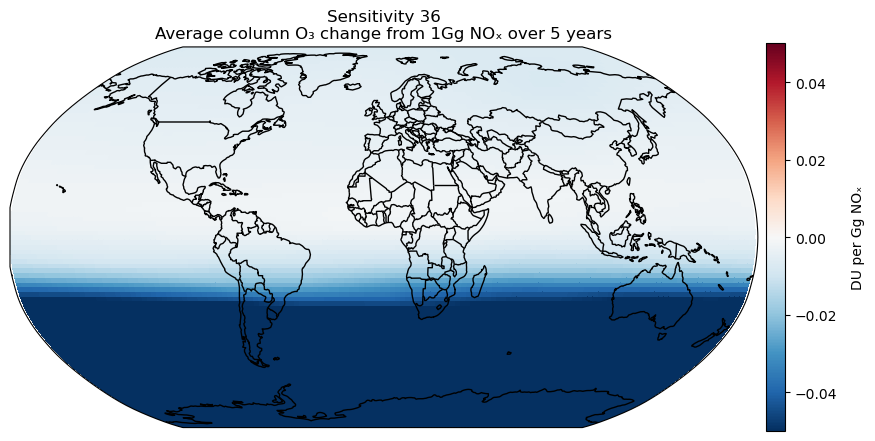

In [35]:
i = 36
avg_grid = mean(colO3_dict["cruise"][i]["data"],dims=3)[:,:,1]

figure(figsize=(10, 8))
ax = subplot(projection=ccrs.Robinson())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                avg_grid, transform=ccrs.PlateCarree(), 
                vmin=-5e-2, vmax=5e-2,cmap="RdBu_r",
)

title("Sensitivity "*string(i)*"\n"*"Average column O₃ change from 1Gg NOₓ over 5 years")
cbar = plt.colorbar(h,fraction=0.025, pad=0.01)
cbar.set_label("DU per Gg NOₓ", labelpad=10)
;

In [36]:
avg_colO3 = zeros(5,40)
for i in 1:n_cruise
    avg_exp = vec(sum(colO3_dict["cruise"][i]["data"] .* area_2x25, dims=(1,2)) ./ sum(area_2x25))
    avg_colO3[:,i] = avg_exp
end 
avg_colO3

5×40 Array{Float64,2}:
 0.000271744  0.000309503  0.000442003  …  -0.00294191  -0.00680769
 0.000265805  0.000326223  0.00047837      -0.00862097  -0.0115456
 0.000271673  0.000325312  0.00050023      -0.0140108   -0.0164544
 0.000277675  0.000319755  0.000476883     -0.0145187   -0.0168198
 0.000260123  0.000310832  0.000476045     -0.016172    -0.0196187

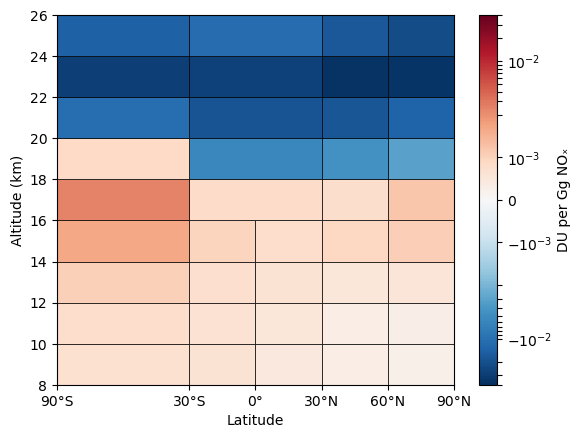

In [37]:
#average over 5 years

# create new cmap
cmap = plt.get_cmap("RdBu_r")
vmin = -4e-2
vmax = 4e-2


sc = plt.scatter(lat_pts, alt_pts, c=mean(avg_colO3,dims=1),
    cmap=cmap,
    norm = matcolors.SymLogNorm(linthresh = 2e-3,
                                                linscale = 1,
                                                vmin = vmin, 
                                                vmax = vmax),
    )

for i in 1:40
    plt.gca().add_patch(matplotlib.patches.Rectangle((
            rect_map[i][1], rect_map[i][2]), rect_map[i][3],rect_map[i][4],
            edgecolor="black",
            lw=0.5,
            facecolor=sc.to_rgba(mean(avg_colO3,dims=1)[i])))
end

cbar = plt.colorbar()
cbar.set_label("DU per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")
plt.xlim([-90,90])
plt.ylim([8,26])

plt.yticks([8,10,12,14,16,18,20,22,24,26])
plt.xticks([-90,-30,0,30,60,90], labels=["90°S","30°S","0°", "30°N", "60°N", "90°N"])

plt.show()


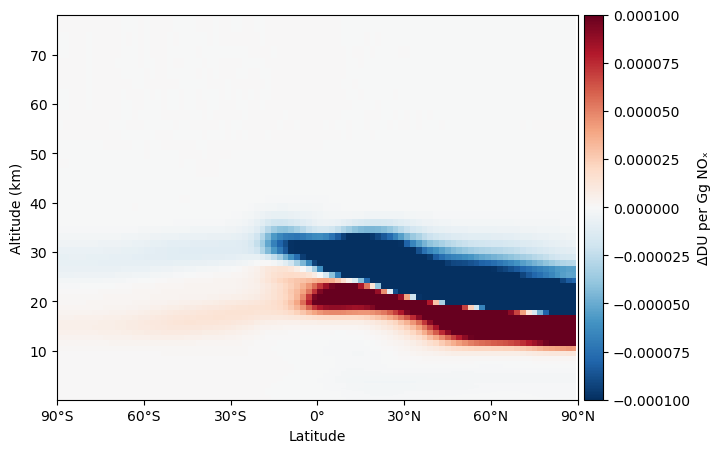

sys:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [38]:
ds1 = ds_sens_2000;
float.(ds1["Sensitivity_col_ozone"][:])[:,:,26]
fig, ax = plt.subplots(1, 1, figsize=(8,5))
h = ax.pcolormesh(float.(ds1["lat"][:]),float.(ds1["height"][:]), 
                    zonalO3_dict["cruise"][26]["data"][:,:,1],
                    vmin=-0.0001,
                    vmax=0.0001,
                    cmap="RdBu_r",
                        )
cbar = plt.colorbar(h,pad=0.01)
cbar.set_label("ΔDU per Gg NOₓ")

plt.ylabel("Altitude (km)")
plt.xlabel("Latitude")

ax.set_xticks([-90,-60,-30,0,30,60,90])
ax.set_xticklabels(["90°S","60°S","30°S","0°","30°N","60°N","90°N"])

plt.show()

## SAVE as NC files -> to be opened/read in ACAI

In [39]:
function find_idxs(x,edges,first::Bool=false)
    #x: array
    #edges: length = 2, bounds of alt, lat, or lon region
    #assume inequality signs are edges[1] < x <= edges[2] UNLESS first_in=True
    #first_in=True for alt = 0, lat = -90, lon = -180
    
    if first
        idxs = findall(x->edges[1]<=x<=edges[2], x)
    else
        idxs = findall(x->edges[1]<x<=edges[2], x)
    end
    
    return idxs
end

find_idxs (generic function with 2 methods)

In [40]:
function create_sensitivity_mask(lon, lat, bounds)
    #Inputs:
    #lon, lat: arrays of coords (units = deg, deg, km)
        #ex) lon = ds["lon"]
    #bounds: type = Tuple. bounds of sensitivity region
        #bounds[1] = lat bounds
        #bounds[2] = lon bounds
    
    #Output: 
    #mask of size = (lon x lat) = (usually 144x91). grid cells within bounds = 1, otherwise 0.
    
    mask = zeros(length(lon), length(lat));
    
    lon_bnds = bounds[1]
    lat_bnds = bounds[2]
    
    lon_bnds[1] == -180 ? first_lon = true : first_lon = false
    lon_idxs = find_idxs(lon,lon_bnds, first_lon);
    
    lat_bnds[1] == -90 ? first_lat = true : first_lat = false
    lat_idxs = find_idxs(lat,lat_bnds,first_lat);
    
    mask[lon_idxs,lat_idxs] .= 1.;
    
    return mask    
end

create_sensitivity_mask (generic function with 1 method)

In [41]:
#Sensitivity regions numbered 1 through 40
#bounds of region i: lat_bounds[i], etc. 

lon_bounds = [-180, 180]
#degrees

lat_bounds = [
    [60, 90], [30, 60], [0, 30], [-30, 0], [-90, -30],
    [60, 90], [30, 60], [0, 30], [-30, 0], [-90, -30],
    [60, 90], [30, 60], [0, 30], [-30, 0], [-90, -30],
    [60, 90], [30, 60], [0, 30], [-30, 0], [-90, -30],
    [60, 90], [30, 60], [-30, 30], [-90, -30],
    [60, 90], [30, 60], [-30, 30], [-90, -30],
    [60, 90], [30, 60], [-30, 30], [-90, -30],
    [60, 90], [30, 60], [-30, 30], [-90, -30],
    [60, 90], [30, 60], [-30, 30], [-90, -30],
]
#degrees

alt_bounds_47 = [
    [27, 28], [27, 28], [27, 28], [27, 28], [27, 28],
    [29, 30], [29, 30], [29, 30], [29, 30], [29, 30],
    [31, 32], [31, 32], [31, 32], [31, 32], [31, 32], 
    [33, 34], [33, 34], [33, 34], [33, 34], [33, 34],
    [35, 36], [35, 36], [35, 36], [35, 36], 
    [37], [37], [37], [37], 
    [38], [38], [38], [38], 
    [39], [39], [39], [39], 
    [40], [40], [40], [40], 
]
#index/layers

alt_bounds_72 = [
    [27, 28], [27, 28], [27, 28], [27, 28], [27, 28],
    [29, 30], [29, 30], [29, 30], [29, 30], [29, 30],
    [31, 32], [31, 32], [31, 32], [31, 32], [31, 32], 
    [33, 34], [33, 34], [33, 34], [33, 34], [33, 34],
    [35, 36], [35, 36], [35, 36], [35, 36], 
    [37, 38], [37, 38], [37, 38], [37, 38], 
    [39, 40], [39, 40], [39, 40], [39, 40], 
    [41, 42], [41, 42], [41, 42], [41, 42], 
    [43, 44], [43, 44], [43, 44], [43, 44], 
]
;

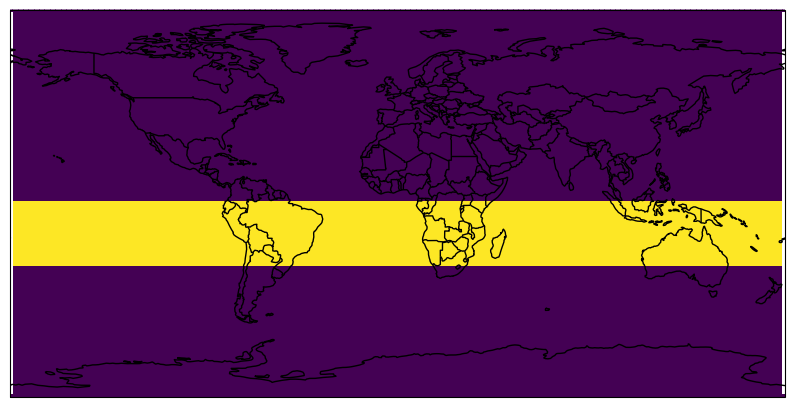

In [42]:
#test create mask function
i = 19
mask_i = create_sensitivity_mask(lon, lat, (lon_bounds, lat_bounds[i]))


figure(figsize=(10, 8))
ax = subplot(projection=ccrs.PlateCarree())

ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS)
h = ax.pcolormesh(repeat(lon,1,91), repeat(reshape(lat,1,length(lat)),144,1), 
                mask_i, transform=ccrs.PlateCarree(),
)

;

scale the NOx RF sensitivities to APMT (subsonic) to capture long-wave (negative) effects

In [52]:
file = matopen("/home/joonheek/NOx_sensitivities/RF_NOx.mat")
RF_O3_short = read(file, "RF_O3_short")
RF_O3_long = read(file, "RF_O3_long")
RF_N_short = read(file, "RF_N_short")
RF_CH4_long = read(file, "RF_CH4_long")
RF_NOx_total = read(file, "RF_NOx_total")
close(file)

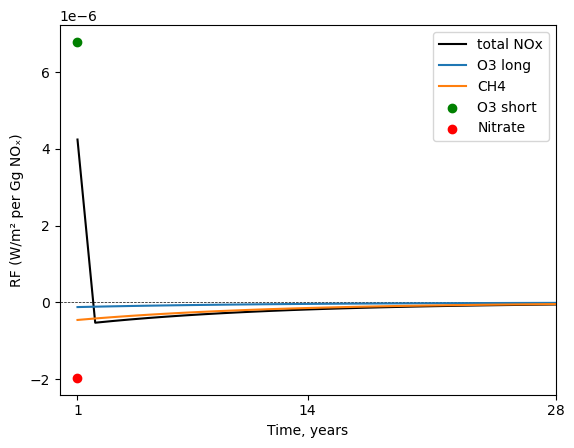

In [53]:
plt.plot(0:28, zeros(29), label="", lw=0.5, ls="--", c="black")
plt.plot(1:28, RF_NOx_total[1:28], label="total NOx", c="black")
plt.plot(1:28, RF_O3_long[1:28], label="O3 long")
plt.plot(1:28, RF_CH4_long[1:28], label="CH4")

# plt.scatter(1,RF_NOx_total[1], c="black",label="")
plt.scatter(1, RF_O3_short[1], c="green", label="O3 short")
plt.scatter(1, RF_N_short[1], c="red", label="Nitrate")


# plt.title("Subsonic NOₓ RF per Gg NOₓ from APMT-IC")

plt.xlim([0, 28])
plt.xticks([1,14,28])

plt.ylabel("RF (W/m² per Gg NOₓ)")
plt.xlabel("Time, years")
plt.legend()
plt.show()

In [62]:
sensitivity_folder = mainfolder*"sensitivities/NOx/"

"/home/joonheek/NOx_sensitivities/nc_files/files/sensitivity_1.nc"

In [56]:
for i in 1:40

    n_years = 28

    #repeat average RF for every future year
    avg_RF = repeat([mean(RF_dict["cruise"][i]["data"])],n_years) #W/m2 per Gg NOx
    
    #scale NOx RF based on subsonic/APMT NOx RF
    RF_NOx_sub = RF_NOx_total[1] #from APMT - scaling point (W/m2 per Gg NOx)
    RF_NOx_i = mean(RF_dict["cruise"][i]["data"])
    ratio = RF_NOx_i/RF_NOx_sub
    RF_NOx_scaled = cat([RF_NOx_i], ratio .* RF_NOx_total[2:28], dims=1) #W/m2 per Gg NOx

    #save IMPULSE responses (only have first year's response = average of first five years)
    avg_PM_grid = mean(PM_dict["cruise"][i]["data"],dims=3) #μg/m³ per Gg NOx
    avg_O3_grid = mean(O3_dict["cruise"][i]["data"],dims=3) #ppbv per Gg NOx
    avg_colO3_grid = mean(colO3_dict["cruise"][i]["data"],dims=3) #DU per Gg NOx
    avg_zonalO3_grid = mean(zonalO3_dict["cruise"][i]["data"],dims=3) #DU per Gg NOx

    mask_latlon = create_sensitivity_mask(lon, lat, (lon_bounds, lat_bounds[i]))
    lev_47 = alt_bounds_47[i]
    lev_72 = alt_bounds_72[i]
    
    
    ds = NCDataset(sensitivity_folder*"sensitivity_"*string(i)*".nc","c")

    defDim(ds,"lon",144)
    defDim(ds,"lat",91)
    defDim(ds, "alt",72)
    defDim(ds,"RFyear",n_years)
    defDim(ds,"AQyear",1)
    defDim(ds,"O3year",1)
    defDim(ds,"lev_47",length(lev_47))
    defDim(ds,"lev_72",length(lev_72))

    ds.attrib["title"] = "Sensitivities for case "*string(i+6)*" or cruise #"*string(i)

    RF = defVar(ds, "RF", Float64, ("RFyear",))
    RF[:] = RF_NOx_scaled
    RF.attrib["units"] = "W/m2 per Gg NOx"

    PM25 = defVar(ds, "PM25", Float64, ("lon","lat","AQyear"))
    PM25[:,:,:] = avg_PM_grid
    PM25.attrib["units"] = "μg/m³ per Gg NOx"

    Sfc_O3 = defVar(ds, "Sfc_O3", Float64, ("lon","lat","AQyear"))
    Sfc_O3[:,:,:] = avg_O3_grid
    Sfc_O3.attrib["units"] = "ppbv per Gg NOx"
    
    Col_O3 = defVar(ds, "Col_O3", Float64, ("lon","lat","O3year"))
    Col_O3[:,:,:] = avg_colO3_grid
    Col_O3.attrib["units"] = "DU per Gg NOx"
    
    Zonal_O3 = defVar(ds, "Zonal_O3", Float64, ("alt", "lat", "O3year"))
    Zonal_O3[:,:,:] = avg_zonalO3_grid
    Zonal_O3.attrib["units"] = "DU per Gg NOx"


    mask = defVar(ds, "mask", Float64, ("lon", "lat"))
    mask[:,:] = mask_latlon
    mask.attrib["comments"] = "horizontal mask to be multiplied by emissions inventory"


    dim_lon = defVar(ds, "lon", Float64, ("lon",))
    dim_lon[:] = lon

    dim_lat = defVar(ds, "lat", Float64, ("lat",))
    dim_lat[:] = lat
    
    dim_alt = defVar(ds, "alt", Float64, ("alt",))
    dim_alt[:] = alt

    dim_RFyear = defVar(ds, "RFyear", Int64, ("RFyear",))
    dim_RFyear[:] = collect(1:n_years)
    
    dim_AQyear = defVar(ds, "AQyear", Int64, ("AQyear",))
    dim_AQyear[:] = [1]   

    dim_O3year = defVar(ds, "O3year", Int64, ("O3year",))
    dim_O3year[:] = [1]   

    dim_lev_47 = defVar(ds, "lev_47", Int64, ("lev_47",))
    dim_lev_47[:] = lev_47
    dim_lev_47.attrib["comments"] = "specifies the indices of the vertical layers corresponding to 47-layer grid"

    dim_lev_72 = defVar(ds, "lev_72", Int64, ("lev_72",))
    dim_lev_72[:] = lev_72
    dim_lev_72.attrib["comments"] = "specifies the indices of the vertical layers corresponding to 72-layer grid"

    close(ds)
    
end